In [1]:
import ultralytics
from ultralytics import YOLO
import cv2
from IPython.display import clear_output
import matplotlib.pyplot as plt
import torch
import time
import numpy as np
import os
import dill
print(torch.cuda.is_available())


True


## Sử dụng model đã train

In [2]:
model1 = YOLO('D://K17_FPT//DAP391m//yolov8//best_86.pt')



In [4]:
# Danh sách các lớp bạn quan tâm
classes_of_interest = ['bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck']



## Một số hàm cần thiết cho việc dự đoán

In [3]:

def get_bboxs(pred):
    boxes = pred.boxes
    xyxy = boxes.xyxy
    conf = boxes.conf 
    clss = boxes.cls                                     
    return xyxy, conf, clss

def draw_all_objects(img, predictions):
    for pred in predictions:
        xyxy, conf, clss = get_bboxs(pred)
        for i in range(len(xyxy)):
            pt1 = int(xyxy[i][0]), int(xyxy[i][1])
            pt2 = int(xyxy[i][2]), int(xyxy[i][3])
            img = cv2.rectangle(img, pt1, pt2, color=(255, 0, 0), thickness=1)
            font = cv2.FONT_HERSHEY_SIMPLEX
            org = pt1
            fontScale = 0.5  # Điều chỉnh kích thước font
            color = (0, 125, 255)
            thickness = 2
            class_name = pred.names[int(clss[i])]
            confidence = conf[i]
            text = f'{class_name}: {confidence:.2f}'  # Sử dụng f-string để tạo chuỗi
            cv2.putText(img, text, org, font, fontScale, color, thickness, cv2.LINE_AA)
    return img
def draw_filtered_objects(img, predictions, classes_of_interest):
    for pred in predictions:
        xyxy, conf, clss = get_bboxs(pred)
        for i in range(len(xyxy)):
            class_idx = int(clss[i])
            class_name = pred.names[class_idx]
            if class_name in classes_of_interest:
                pt1 = int(xyxy[i][0]), int(xyxy[i][1])
                pt2 = int(xyxy[i][2]), int(xyxy[i][3])
                img = cv2.rectangle(img, pt1, pt2, color=(255, 0, 0), thickness=1)
                font = cv2.FONT_HERSHEY_SIMPLEX
                org = pt1
                fontScale = 0.5
                color = (0, 125, 255)
                thickness = 2
                confidence = conf[i]
                text = f'{class_name}: {confidence:.2f}'
                cv2.putText(img, text, org, font, fontScale, color, thickness, cv2.LINE_AA)
    return img



## Test với một ảnh bất kì


0: 448x640 4 buss, 71 cars, 4 motors, 5 pedestrians, 6 peoples, 15 trucks, 10 vans, 212.5ms
Speed: 4.0ms preprocess, 212.5ms inference, 99.8ms postprocess per image at shape (1, 3, 448, 640)


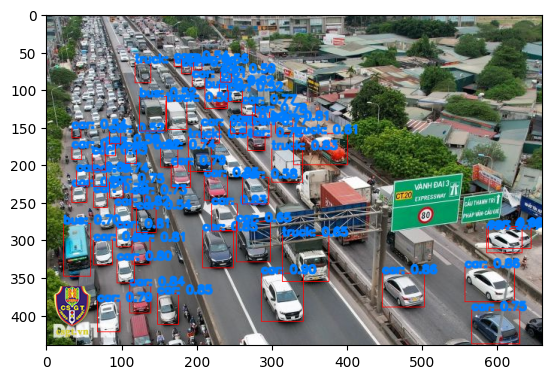

In [5]:
img = cv2.imread("D://K17_FPT//DAP391m//yolov8//1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pred = model1.predict(img)[0]
xyxy, conf, clss = get_bboxs(pred)
img = draw_filtered_objects(img,pred[conf>0.5],classes_of_interest)
plt.imshow(img)
plt.show()



In [69]:
model1.names

{0: 'car', 1: 'truck', 2: 'bus'}

## Test với file test ảnh


0: 384x640 12 cars, 14 trucks, 3 vans, 22.9ms
Speed: 3.0ms preprocess, 22.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


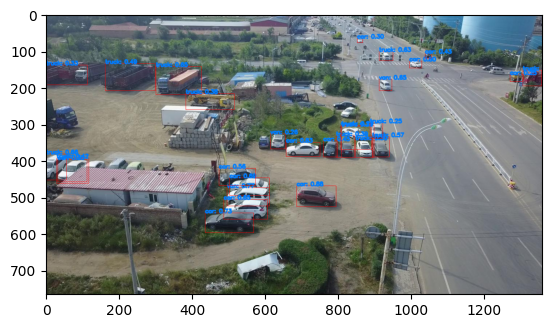


0: 384x640 21 cars, 1 pedestrian, 3 peoples, 6 trucks, 4 vans, 21.9ms
Speed: 3.0ms preprocess, 21.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


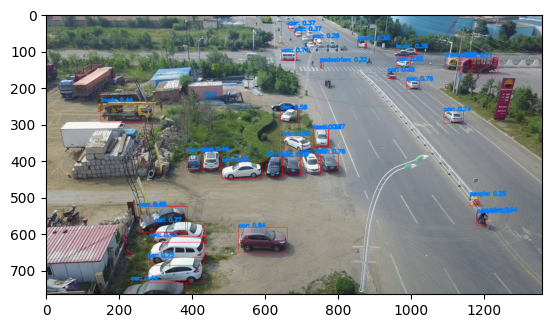


0: 384x640 12 cars, 3 motors, 1 pedestrian, 2 trucks, 20.9ms
Speed: 3.0ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


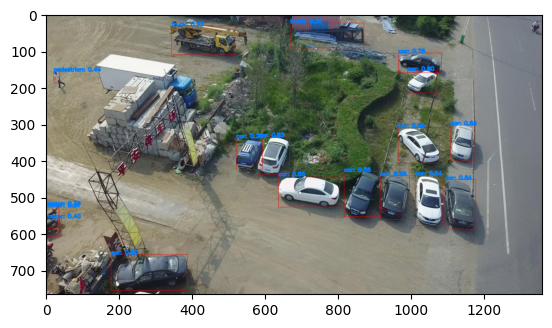


0: 384x640 11 cars, 2 pedestrians, 2 trucks, 2 vans, 20.9ms
Speed: 7.0ms preprocess, 20.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


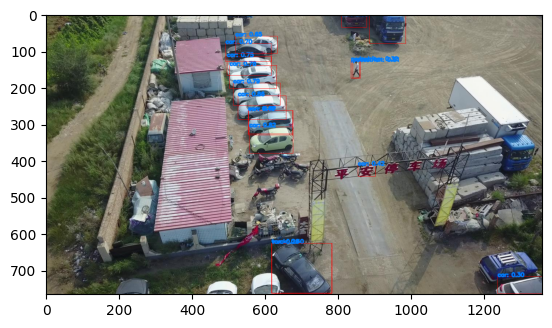


0: 384x640 8 cars, 1 people, 1 tricycle, 9 trucks, 20.9ms
Speed: 3.0ms preprocess, 20.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


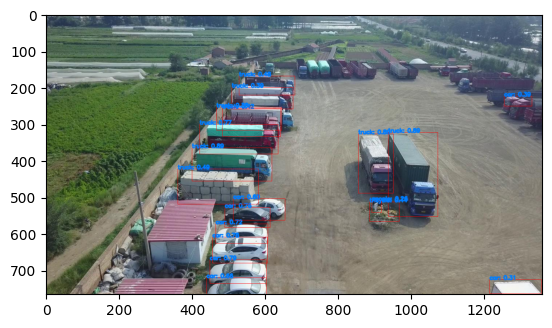


0: 384x640 3 cars, 13 trucks, 20.5ms
Speed: 4.0ms preprocess, 20.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


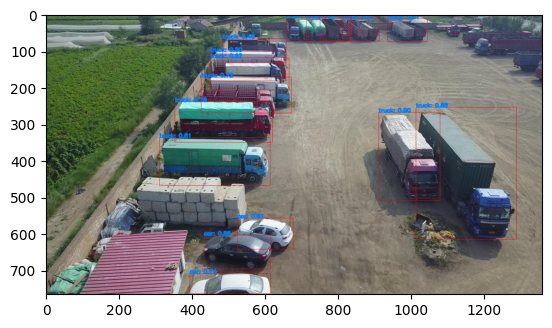

In [84]:
# # Đường dẫn đến thư mục chứa tất cả các ảnh bạn muốn dự đoán
image_folder = "D://K17_FPT//DAP391m//yolov8//VisDrone2019-DET.v4i.yolov8//test//images"


# Đọc danh sách các tệp hình ảnh trong thư mục
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]
number =0
# Lặp qua từng ảnh và thực hiện dự đoán
for image_file in image_files:
    if number >5:
        break
    if number <=5:

        image_path = os.path.join(image_folder, image_file)
        
        # Đọc ảnh và chuyển đổi sang định dạng RGB (nếu cần)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Thực hiện dự đoán trên ảnh
        pred = model1.predict(img)[0]
        
        # Lấy thông tin bbox
        xyxy, conf, clss = get_bboxs(pred)
        
        # Vẽ các đối tượng trên ảnh
        img = draw_all_objects(img, pred)
        number +=1
        # Hiển thị ảnh hoặc lưu lại (tuỳ chọn)
        plt.imshow(img)
        plt.show()



## Test thử với video

In [27]:
import cv2

cap = cv2.VideoCapture("C://Users//Admin//Desktop//vehicle-counting.mp4")
# cap = cv2.VideoCapture("D://K17_FPT//DAP391m//yolov8//video.mp4")

# Get video frame dimensions and fps
frame_width = 1280
frame_height = 720
fps = int(cap.get(cv2.CAP_PROP_FPS) + 0.5)  # Get the frame rate and round it to the nearest integer


# Define the VideoWriter to save the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('video_result.mp4', fourcc, fps, (frame_width, frame_height))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Perform predictions and draw objects on the frame as you did before
    pred = model1.predict(frame[:, :, ::-1])[0]
    frame = cv2.resize(frame,(frame_width, frame_height))
    img = draw_filtered_objects(frame, pred,classes_of_interest)

    # Write the processed frame to the output video
    out.write(img)

    cv2.imshow('frame', img)
    clear_output(wait=True)

    # Exit when 'q' key is pressed
    if cv2.waitKey(1) == 27:
        break

# Release the VideoCapture and VideoWriter
cap.release()
out.release()
cv2.destroyAllWindows()



0: 384x640 1 bus, 4 cars, 3 trucks, 1 van, 20.9ms
Speed: 46.4ms preprocess, 20.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


## Đếm xe trên làn đường

In [28]:

model = YOLO('best_86.pt')
# model = model1
palette = (2 * 11 - 1, 2 * 15 - 1, 2 ** 20 - 1)

def compute_color_for_labels(label):
    if label == 0: #person
        color = (85,45,255)
    elif label == 2: # Car
        color = (222,82,175)
    elif label == 3:  # Motobike
        color = (0, 204, 255)
    elif label == 5:  # Bus
        color = (0, 149, 255)
    else:
        color = []
        for p in palette:
            color.append(int((p * (label ** 2 - label + 1)) % 255))
    #thay 3 dòng trên thành thế này cũng được: color = [int((p * (label ** 2 - label + 1)) % 255) for p in palette]
    return tuple(color)

def draw(img, xyxy, conf, clss):
    for i in range(len(xyxy)):
        pt1 = int(xyxy[i][0]), int(xyxy[i][1])
        pt2 = int(xyxy[i][2]), int(xyxy[i][3])
        text = f'{conf[i]:.2f} {model.names[clss[i].item()]}'
        img = cv2.rectangle(img, pt1, pt2, compute_color_for_labels(int(clss[i].item())), thickness=2)
        img = cv2.putText(img, text, (pt1[0], pt1[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, compute_color_for_labels(int(clss[i].item())), thickness=1)
    return img

def count_vehicles(clss_list):
    vehicle_counts = {}
    for i in range(len(clss_list)):
        clss_name = model.names[clss[i].item()]
        if clss_name not in vehicle_counts:
            vehicle_counts[clss_name] = 1
        else:
            vehicle_counts[clss_name] += 1
    return vehicle_counts

def pega_centro(x_min, y_min, x_max, y_max):
    center_x = (x_min + x_max) / 2
    center_y = (y_min + y_max) / 2
    return int(center_x), int(center_y)

cap = cv2.VideoCapture("C://Users//Admin//Desktop//vehicle-counting.mp4")
frame_width = 1280
frame_height = 720
# fps = int(cap.get(cv2.CAP_PROP_FPS) + 0.5) 

detec = []
offset = 6
carros= 0
off_set = 12
car_ros = 0

if not cap.isOpened():
    print("Không thể mở video")
else:
    out = cv2.VideoWriter('video_result.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 60, (frame_width, frame_height))
    while True:
        ret, frame = cap.read()
        if ret == True:
            start = time.time()
            frame = cv2.resize(frame, (frame_width, frame_height))
            pred = model.predict(frame[:,:,::-1])[0]
            xyxy_list, conf_list, clss_list = get_bboxs(pred)
            img = draw_all_objects(frame, pred[conf_list>0.6])
            num_vehicles = count_vehicles(clss_list)
            num_vehicles = ', '.join([f"{key}: {value}" for key, value in num_vehicles.items()])
            end = time.time()
            fps = 1 / (end - start)
            cv2.putText(img, f"{num_vehicles} vehicles", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            cv2.putText(img, f"{fps:.2f} FPS", (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)  
                      
            altura, largura= frame.shape  # Lấy kích thước của frame            #hoặc dùng 'altura, largura = frame.shape[:2]' cũng được
            linha = int(altura * 3 / 4)                                             #Tính vị trí linha dựa vào tỉ lệ 3/4 chiều cao của frame
            cv2.line(frame, (0, linha), (largura, linha), (0, 0, 255), 3)
            
            for i in range(len(xyxy_list)):
                (x,y,w,h) = xyxy_list[i].cpu().numpy()
                centro = pega_centro(x, y, w, h)
                detec.append(centro)
                cv2.circle(img, detec[-1], 4, (0, 0,255), -1)
                
            for (x, y) in detec:
                if y < (linha + offset) and y > (linha - off_set):
                    if (x >= 0) and (x <= largura/2):
                        carros += 1
                        cv2.line(frame, (0, linha), (largura, linha), (238, 130, 238), 3)
                        detec.remove((x, y))

                    else:
                        car_ros += 1
                        cv2.line(frame, (0, linha), (largura, linha), (0, 255, 0), 3)
                        detec.remove((x, y))


            cv2.putText(frame, "Enter: " + str(carros), (450, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 5)
            cv2.putText(frame, "Leave: " + str(car_ros), (450, 140), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 5)

            cv2.imshow('frame', img)
            clear_output(wait=True)
            k = cv2.waitKey(20)
            if k == 113:
                break
        else:
            break
        out.write(image)
    cap.release()
    out.release()
    cv2.destroyAllWindows()


0: 384x640 2 buss, 2 cars, 2 trucks, 1 van, 21.9ms
Speed: 7.0ms preprocess, 21.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


ValueError: too many values to unpack (expected 2)

In [72]:
model.names[clss[1].item()]

'truck'